In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 1. 讀入 Fashion MNSIT 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

### 3. 資料整理

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#### 做 one hot encoding

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10) 

In [11]:
y_test = to_categorical(y_train, 10) 

# 做神經網路

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # 選擇最好的學習方式

In [13]:
# 開一台函數學習機
model = Sequential()

In [14]:
model.add(Dense(88, input_dim = 784, activation='relu'))

In [15]:
model.add(Dense(88, activation='relu'))

In [16]:
model.add(Dense(10, activation='softmax'))

# 組裝神經網路

In [17]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 88)                7832      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                890       
Total params: 77,802
Trainable params: 77,802
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0712 - accuracy: 0.4899
Epoch 2/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0439 - accuracy: 0.6924
Epoch 3/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0359 - accuracy: 0.7710
Epoch 4/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0314 - accuracy: 0.8002
Epoch 5/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0289 - accuracy: 0.8123
Epoch 6/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0273 - accuracy: 0.8198
Epoch 7/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0262 - accuracy: 0.8260
Epoch 8/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0254 - accuracy: 0.8307
Epoch 9/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0247 - accuracy: 0.8350
Epoch 10/20
60

In [20]:
result = model.predict_classes(x_test)

預測結果： Coat Trouser Bag


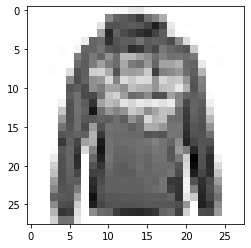

In [26]:
n = [2020, 3, 18]
print('預測結果：', class_names[result[n[0]]], class_names[result[n[1]]], class_names[result[n[2]]])
plt.imshow(x_test[n[0]].reshape(28, 28), cmap='Greys')

預測結果： Trouser


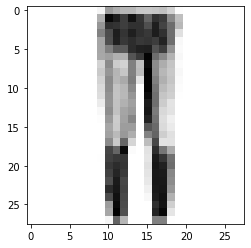

In [22]:
n = 3
print('預測結果：', class_names[result[3]])
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')

預測結果： Bag


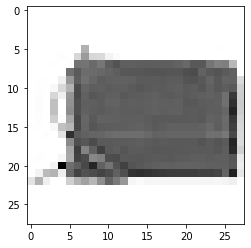

In [23]:
n =18
print('預測結果：', class_names[result[n]])
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')

#### 作業調整
1. loss function 改為 'mean_absolute_error'
1.  batch_size=80, epochs=25
1. → 準確率上升

In [27]:
model.compile(loss='mean_absolute_error', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, batch_size=80, epochs=25)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 88)                7832      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                890       
Total params: 77,802
Trainable params: 77,802
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0243 - accuracy: 0.8866
Epoch 2/25
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0243 - accuracy: 0.8861
Epoch 3/25
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0242 - accuracy: 0.8860
Epoch 4/25
60000/60000 [==============

1. optimizer=SGD(lr=0.095)
1. batch_size=70, epochs=23
1. → 準確率沒有太大變化

In [28]:
model.compile(loss='mean_absolute_error', optimizer=SGD(lr=0.095), metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, batch_size=70, epochs=23)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 88)                7832      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                890       
Total params: 77,802
Trainable params: 77,802
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/23
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0225 - accuracy: 0.8946
Epoch 2/23
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0224 - accuracy: 0.8947
Epoch 3/23
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0224 - accuracy: 0.8949
Epoch 4/23
60000/60000 [==============